## Basic Graph containing Passes Data 
Here I will be testing the API from statsbombpy. 

In [40]:
# imports 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Here Comes the data from leagues:

In [2]:
from statsbombpy import sb

In [16]:
data = {
    'x': [2010, 2015, 2020, 2025, 2030],
    'y': [1, 2, 3, 4, 5]
}

In [17]:
print(data)

{'x': [2010, 2015, 2020, 2025, 2030], 'y': [1, 2, 3, 4, 5]}


#### Let's Graph the data

In [4]:
competitions = sb.competitions()
print(competitions)

c:\Users\user\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


    competition_id  season_id   country_name    competition_name  \
0                9         27        Germany       1. Bundesliga   
1               16          4         Europe    Champions League   
2               16          1         Europe    Champions League   
3               16          2         Europe    Champions League   
4               16         27         Europe    Champions League   
..             ...        ...            ...                 ...   
60              12         86          Italy             Serie A   
61              55         43         Europe           UEFA Euro   
62              35         75         Europe  UEFA Europa League   
63              53        106         Europe   UEFA Women's Euro   
64              72         30  International   Women's World Cup   

   competition_gender  competition_youth  competition_international  \
0                male              False                      False   
1                male              False 

## Matches of the World Cup: 

In [66]:
competition_id = 43
season_id = 106
matches = sb.matches(competition_id=competition_id, season_id=season_id)

print(matches)

c:\Users\user\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


    match_id  match_date      kick_off                     competition season  \
0    3857256  2022-12-02  21:00:00.000  International - FIFA World Cup   2022   
1    3869151  2022-12-03  21:00:00.000  International - FIFA World Cup   2022   
2    3857257  2022-11-30  17:00:00.000  International - FIFA World Cup   2022   
3    3857258  2022-11-24  21:00:00.000  International - FIFA World Cup   2022   
4    3857288  2022-11-26  12:00:00.000  International - FIFA World Cup   2022   
..       ...         ...           ...                             ...    ...   
59   3857265  2022-11-22  18:00:00.000  International - FIFA World Cup   2022   
60   3857262  2022-12-02  17:00:00.000  International - FIFA World Cup   2022   
61   3857261  2022-11-29  21:00:00.000  International - FIFA World Cup   2022   
62   3857255  2022-12-01  21:00:00.000  International - FIFA World Cup   2022   
63   3857254  2022-11-22  15:00:00.000  International - FIFA World Cup   2022   

      home_team    away_tea

## Filtering data France-England

The filter is based in: 
- Team
- Type
-Second
- Minute
- Location where the pass is made
- Location where the pass finish
- The player that has the ball

In [14]:
match_id = 3869354

test_match = sb.events(match_id=match_id)
england = test_match[['team', 'type', 'pass_outcome', 'minute', 'second', 'location', 'pass_end_location', 'player']][test_match['team'] == 'England']

print(test_match.columns)
print(england)

c:\Users\user\anaconda3\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_deflection',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_penalty', 'foul_won_advantage',
       'foul_won_defensive', 'foul_won_penalty', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_punched_out', 'goalkeeper_technique', 'goalkeeper_type',
       'id', 'index', 'injury_stoppage_in_chain', 'interception_outcome',
       'location', 'match_id', 'minute', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_deflected',
       

## Data from the game available
Now it's time to setup a metric to save the passes of each player.

Jude Bellingham


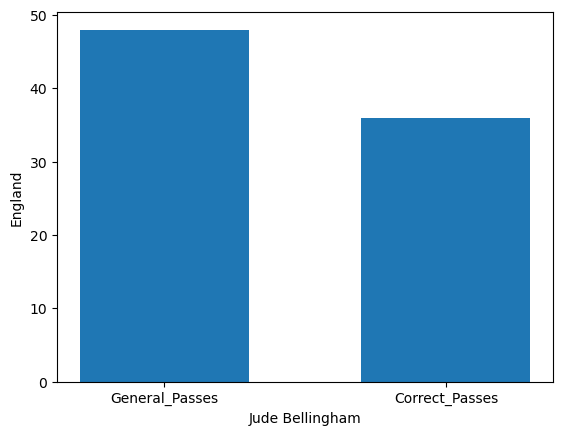

In [111]:
# Here I will put data from Jude Bellingham
test_player = england[england['player'] == 'Jude Bellingham'].reset_index()

# Filtering the correct passes
passes_correct = test_player[np.logical_and(pd.isna(test_player['pass_outcome']), test_player['type'] == 'Pass')]
passes_general = test_player[test_player['type'] == 'Pass']

categories = ['General_Passes', 'Correct_Passes']
items = [len(passes_general), len(passes_correct)]


# print('Passes Correct:', len(passes_correct), 'Passes in General:', passes_general)
plt.bar(categories, items, width=0.6)
plt.xlabel(test_player['player'][0])
plt.ylabel(test_player['team'][0])

print(test_player['player'][0])